In [56]:
import investpy
import pandas as pd 
import datetime 
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt

In [26]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/db/fc/10b7d339ccf6725e13408d76fb1e944f512590a949af426503c38d4af712/yfinance-0.2.41-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 325.1 kB/s eta 0:00:09
     ---------------------------------------- 0.0/3.0 MB 325.1 kB/s et

In [57]:
import yfinance as yf
company ='HPG.VN'
start = datetime.datetime.now().strftime('%Y-%m-%d')
end = (datetime.datetime.now() -datetime.timedelta(days=1000)).strftime('%Y-%m-%d')
df=yf.download(company,start= end, end=start)
df=pd.DataFrame(df)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-16,37272.726562,37482.515625,36363.636719,36363.636719,36363.636719,58579949
2021-11-17,36363.636719,36783.214844,35944.054688,35944.054688,35944.054688,45582536
2021-11-18,35944.054688,35944.054688,34685.316406,34930.070312,34930.070312,87199111
2021-11-19,34685.316406,34755.246094,33496.503906,33566.433594,33566.433594,69781425
2021-11-22,33706.292969,34405.593750,33566.433594,34020.980469,34020.980469,33694946
...,...,...,...,...,...,...
2024-08-05,26800.000000,26850.000000,25800.000000,25950.000000,25950.000000,46010000
2024-08-06,26050.000000,26450.000000,25850.000000,26300.000000,26300.000000,20427400
2024-08-07,26450.000000,26450.000000,25950.000000,26050.000000,26050.000000,16249700


In [58]:
df['H-L']=df['High']-df['Low']
df['O-C']=df['Open']-df['Close']
df['MA 7']=df['Close'].rolling(window= 7).mean()
df['MA 21']= df['Close'].rolling(window=21).mean()
df['MA 200']= df['Close'].rolling(window=200).mean()
df.dropna(inplace=True)
df.to_csv(f'{company}.csv')
df

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,MA 7,MA 21,MA 200
Date,,,,,,,,,,,
2022-09-06,21818.181641,22000.000000,21409.091797,21409.091797,21409.091797,17086189,590.908203,409.089844,21279.221261,21525.974051,27907.902119
2022-09-07,21409.091797,21636.363281,20909.091797,20909.091797,20909.091797,28045049,727.271484,500.000000,21168.831752,21512.987072,27830.629395
2022-09-08,21090.908203,21318.181641,20818.181641,21000.000000,21000.000000,22622049,500.000000,90.908203,21116.883650,21491.342076,27755.909121
2022-09-09,21227.273438,21636.363281,21000.000000,21636.363281,21636.363281,29169909,636.363281,-409.089844,21220.779576,21478.355004,27689.440586
2022-09-12,21727.273438,22090.908203,21636.363281,21636.363281,21636.363281,29139989,454.544922,90.910156,21318.182199,21478.355004,27629.790234
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,26800.000000,26850.000000,25800.000000,25950.000000,25950.000000,46010000,1050.000000,850.000000,27192.857143,27954.761905,26391.999971
2024-08-06,26050.000000,26450.000000,25850.000000,26300.000000,26300.000000,20427400,600.000000,-250.000000,27028.571429,27835.714286,26410.772695
2024-08-07,26450.000000,26450.000000,25950.000000,26050.000000,26050.000000,16249700,500.000000,400.000000,26764.285714,27695.238095,26431.931787


In [59]:
pre_day= 30
scala_x=MinMaxScaler(feature_range=(0,1))
scala_y=MinMaxScaler(feature_range=(0,1))
cols_x= ['Adj Close','Volume','H-L','O-C','MA 7','MA 21','MA 200']
cols_y=['Close']
scaled_data_x= scala_x.fit_transform(df[cols_x].values.reshape(-1,len(cols_x)))
scaled_data_y= scala_y.fit_transform(df[cols_y].values.reshape(-1,len(cols_y)))
x_total=[]
y_total=[]
for i in range(pre_day,len(df)):
    x_total.append(scaled_data_x[i-pre_day:i])
    y_total.append(scaled_data_y[i])


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(x_total,y_total,test_size=0.2)

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [66]:
model =Sequential()
model.add(LSTM(units=60, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60))
model.add(Dropout(0.2))
model.add(Dense(units=len(cols_y)))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=120, steps_per_epoch=40)
model.save(f"{company}.h5")
print("Done Training Model")

Epoch 1/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.1145
Epoch 2/120
 3/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0133

C:\Users\nguye\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0253
Epoch 3/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0137
Epoch 4/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0131
Epoch 5/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0121
Epoch 6/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0075
Epoch 7/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0101
Epoch 8/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0113
Epoch 9/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0072
Epoch 10/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0069
Epoch 11/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0089
Epoch 12/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0073
Epoch 13/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0067
Epoch 14/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0061
Epoch 15/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0062
Epoch 16/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0067


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0033
Epoch 83/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0026
Epoch 84/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0027
Epoch 85/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0024
Epoch 86/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0028
Epoch 87/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0028
Epoch 88/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0036
Epoch 89/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0034
Epoch 90/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0025
Epoch 91/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0037
Epoch 92/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0025
Epoch 93/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0032
Epoch 94/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0029
Epoch 95/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0033
Epoch 96/120
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 

Done Training Model


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


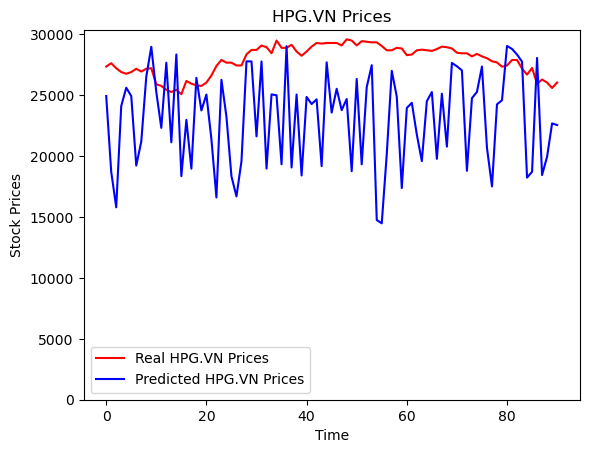

In [68]:
test_size=len(y_test)
predict_prices=model.predict(X_test)
predict_prices=scala_y.inverse_transform(predict_prices)
real_price = df[len(df)-test_size:]['Close'].values.reshape(-1, 1)
real_price = np.array(real_price)
real_price = real_price.reshape(real_price.shape[0], 1)

plt.plot(real_price, color="red", label=f"Real {company} Prices")
plt.plot(predict_prices, color="blue", label=f"Predicted {company} Prices")
plt.title(f"{company} Prices")
plt.xlabel("Time")
plt.ylabel("Stock Prices")
plt.ylim(bottom=0)
plt.legend()
plt.show()

In [69]:
x_predict = df[len(df)-pre_day:][cols_x].values.reshape(-1, len(cols_x))
x_predict = scala_x.transform(x_predict)
x_predict = np.array(x_predict)
x_predict = x_predict.reshape(1, x_predict.shape[0], len(cols_x))
prediction = model.predict(x_predict)
prediction = scala_y.inverse_transform(prediction)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[26924.66]]
